# EDA

# 라이브러리 불러오기

In [187]:
!apt -qq -y install fonts-nanum

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 한글폰트 설정
plt.rc("font", family="NanumGothic")
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid", palette="pastel", font_scale=1.1)

# 데이터 개요

In [189]:
url1 = "https://raw.githubusercontent.com/s0nghyunje0ng/2025-weather-bigdata-contest/safety/topic2_safety/data/raw/call119_train.csv"
url2 = "https://raw.githubusercontent.com/s0nghyunje0ng/2025-weather-bigdata-contest/safety/topic2_safety/data/raw/cat119_train.csv"
df_call = pd.read_csv(url1)
df_cat = pd.read_csv(url2)

## 원본 구조 확인

### df_call

In [190]:
print(f"df_call {df_call.shape}")
df_call.head()

df_call (42924, 14)


,call119_train.tm,call119_train.address_city,call119_train.address_gu,call119_train.sub_address,call119_train.stn,call119_train.ta_max,call119_train.ta_min,call119_train.ta_max_min,call119_train.hm_min,call119_train.hm_max,call119_train.ws_max,call119_train.ws_ins_max,call119_train.rn_day,call119_train.call_count
0,20200501,부산광역시,강서구,대저2동,904,23.7,16.6,7.1,63.2,90.3,5.8,10.6,0.0,1
1,20200501,부산광역시,강서구,천성동,921,24.3,15.4,8.9,64.2,96.4,4.8,8.6,0.0,1
2,20200501,부산광역시,금정구,금사동,940,25.6,17.2,8.4,46.6,76.4,4.8,8.3,0.0,1
3,20200501,부산광역시,금정구,금성동,941,25.3,17.1,8.2,-99.0,-99.0,7.1,9.7,0.0,1
4,20200501,부산광역시,금정구,남산동,939,26.5,16.7,9.8,-99.0,-99.0,5.7,8.1,0.0,3


In [191]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42924 entries, 0 to 42923
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   call119_train.tm            42924 non-null  int64  
 1   call119_train.address_city  42924 non-null  object 
 2   call119_train.address_gu    42924 non-null  object 
 3   call119_train.sub_address   42924 non-null  object 
 4   call119_train.stn           42924 non-null  int64  
 5   call119_train.ta_max        42924 non-null  float64
 6   call119_train.ta_min        42924 non-null  float64
 7   call119_train.ta_max_min    42924 non-null  float64
 8   call119_train.hm_min        42924 non-null  float64
 9   call119_train.hm_max        42924 non-null  float64
 10  call119_train.ws_max        42924 non-null  float64
 11  call119_train.ws_ins_max    42924 non-null  float64
 12  call119_train.rn_day        42924 non-null  float64
 13  call119_train.call_count    429

### df_cat

In [192]:
print(f"df_cat {df_cat.shape}")
df_cat.head()

df_cat (61771, 8)


,cat119_train.tm,cat119_train.address_city,cat119_train.address_gu,cat119_train.sub_address,cat119_train.cat,cat119_train.sub_cat,cat119_train.stn,cat119_train.call_count
0,20200501,부산광역시,강서구,대저2동,구급,교통사고,904,1
1,20200501,부산광역시,강서구,천성동,구조,교통사고,921,1
2,20200501,부산광역시,금정구,금사동,구급,부상,940,1
3,20200501,부산광역시,금정구,금성동,기타,업무운행,941,1
4,20200501,부산광역시,금정구,남산동,구급,부상,939,1


In [193]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61771 entries, 0 to 61770
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   cat119_train.tm            61771 non-null  int64 
 1   cat119_train.address_city  61771 non-null  object
 2   cat119_train.address_gu    61771 non-null  object
 3   cat119_train.sub_address   61771 non-null  object
 4   cat119_train.cat           61771 non-null  object
 5   cat119_train.sub_cat       61771 non-null  object
 6   cat119_train.stn           61771 non-null  int64 
 7   cat119_train.call_count    61771 non-null  int64 
dtypes: int64(3), object(5)
memory usage: 3.8+ MB


## 기본 전처리

In [194]:
df_call.columns = [col.replace("call119_train.", "") for col in df_call.columns]
df_cat.columns = [col.replace("cat119_train.", "") for col in df_cat.columns]

In [195]:
df_call["tm"] = pd.to_datetime(df_call["tm"], format="%Y%m%d")
df_call["stn"] = df_call["stn"].astype("category")
df_call["address_city"] = df_call["address_city"].astype("category")
df_call["address_gu"] = df_call["address_gu"].astype("category")
df_call["sub_address"] = df_call["sub_address"].astype("category")

df_cat["tm"] = pd.to_datetime(df_cat["tm"], format="%Y%m%d")
df_cat["stn"] = df_cat["stn"].astype("category")
df_cat["address_city"] = df_cat["address_city"].astype("category")
df_cat["address_gu"] = df_cat["address_gu"].astype("category")
df_cat["sub_address"] = df_cat["sub_address"].astype("category")
df_cat["cat"] = df_cat["cat"].astype("category")
df_cat["sub_cat"] = df_cat["sub_cat"].astype("category")

### df_call

In [196]:
df_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42924 entries, 0 to 42923
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tm            42924 non-null  datetime64[ns]
 1   address_city  42924 non-null  category      
 2   address_gu    42924 non-null  category      
 3   sub_address   42924 non-null  category      
 4   stn           42924 non-null  category      
 5   ta_max        42924 non-null  float64       
 6   ta_min        42924 non-null  float64       
 7   ta_max_min    42924 non-null  float64       
 8   hm_min        42924 non-null  float64       
 9   hm_max        42924 non-null  float64       
 10  ws_max        42924 non-null  float64       
 11  ws_ins_max    42924 non-null  float64       
 12  rn_day        42924 non-null  float64       
 13  call_count    42924 non-null  int64         
dtypes: category(4), datetime64[ns](1), float64(8), int64(1)
memory usage: 3.5 MB


In [197]:
df_call.describe()

,tm,ta_max,ta_min,ta_max_min,hm_min,hm_max,ws_max,ws_ins_max,rn_day,call_count
count,42924,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000,42924.000000
mean,2022-02-03 04:43:36.717920,26.025443,18.431968,7.286723,45.600601,76.598558,4.422377,8.185700,8.280265,1.916760
min,2020-05-01 00:00:00,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.000000
25%,2021-05-13 00:00:00,23.600000,15.500000,5.500000,40.200000,83.300000,3.400000,6.100000,0.000000,1.000000
50%,2021-10-30 00:00:00,26.600000,19.500000,7.500000,56.500000,91.800000,4.200000,7.700000,0.000000,1.000000
75%,2022-10-28 06:00:00,29.400000,22.500000,9.600000,67.700000,96.700000,5.500000,9.900000,2.000000,2.000000
max,2023-10-31 00:00:00,37.600000,29.000000,23.000000,99.500000,100.000000,30.700000,37.800000,259.200000,115.000000
std,NaN,8.059514,8.093267,6.623270,43.425352,49.403930,6.343533,7.183937,27.216865,2.058855


In [198]:
df_call.describe(include=["category"])

,address_city,address_gu,sub_address,stn
count,42924,42924,42924,42924
unique,1,16,136,12
top,부산광역시,부산진구,연산동,940
freq,42924,4795,730,7415


In [199]:
cat_cols = df_call.select_dtypes(include=["category"]).columns.tolist()

for col in cat_cols:
    print(f"{col} : {df_call[col].cat.categories.tolist()}")

address_city : ['부산광역시']
address_gu : ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
sub_address : ['가야동', '감만동', '감전동', '감천동', '강동동', '개금동', '거제동', '광복동', '광안동', '괘법동', '괴정동', '구랑동', '구서동', '구평동', '구포동', '금곡동', '금사동', '금성동', '기장읍', '낙민동', '남부민동', '남산동', '남천동', '남포동', '남항동', '노포동', '녹산동', '눌차동', '다대동', '당감동', '당리동', '대교동', '대연동', '대저1동', '대저2동', '대창동', '대청동', '대평동', '대항동', '덕천동', '덕포동', '동광동', '동대신동', '동삼동', '동선동', '두구동', '만덕동', '망미동', '명륜동', '명장동', '명지동', '모라동', '문현동', '미음동', '민락동', '반송동', '반여동', '범방동', '범일동', '범전동', '범천동', '보수동', '복천동', '봉래동', '봉림동', '부곡동', '부민동', '부암동', '부용동', '부전동', '부평동', '사직동', '삼락동', '생곡동', '서대신동', '서동', '석대동', '선동', '성북동', '송정동', '수안동', '수영동', '수정동', '식만동', '신선동', '신창동', '신평동', '신호동', '아미동', '안락동', '암남동', '양정동', '엄궁동', '연산동', '연지동', '영선동', '영주동', '오륜동', '온천동', '용당동', '용호동', '우동', '우암동', '일광면', '일광읍', '장림동', '장안읍', '장전동', '재송동', '전포동', '정관면', '정관읍', '좌동', '좌천동', '주례동', '죽동동', '죽림동', '중동', '중앙동', '지사동

### df_cat

In [200]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61771 entries, 0 to 61770
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   tm            61771 non-null  datetime64[ns]
 1   address_city  61771 non-null  category      
 2   address_gu    61771 non-null  category      
 3   sub_address   61771 non-null  category      
 4   cat           61771 non-null  category      
 5   sub_cat       61771 non-null  category      
 6   stn           61771 non-null  category      
 7   call_count    61771 non-null  int64         
dtypes: category(6), datetime64[ns](1), int64(1)
memory usage: 1.4 MB


In [201]:
df_cat.describe()

,tm,call_count
count,61771,61771.000000
mean,2022-01-31 17:22:36.112091392,1.331936
min,2020-05-01 00:00:00,1.000000
25%,2021-05-19 00:00:00,1.000000
50%,2021-10-24 00:00:00,1.000000
75%,2022-10-23 00:00:00,1.000000
max,2023-10-31 00:00:00,72.000000
std,NaN,1.288823


In [202]:
df_cat.describe(include=["category"])

,address_city,address_gu,sub_address,cat,sub_cat,stn
count,61771,61771,61771,61771,61771,61771
unique,1,16,136,4,23,12
top,부산광역시,부산진구,연산동,구급,부상,940
freq,61771,6936,2063,44141,23541,11272


In [203]:
cat_cols = df_cat.select_dtypes(include=["category"]).columns.tolist()

for col in cat_cols:
    print(f"{col} : {df_cat[col].cat.categories.tolist()}")

address_city : ['부산광역시']
address_gu : ['강서구', '금정구', '기장군', '남구', '동구', '동래구', '부산진구', '북구', '사상구', '사하구', '서구', '수영구', '연제구', '영도구', '중구', '해운대구']
sub_address : ['가야동', '감만동', '감전동', '감천동', '강동동', '개금동', '거제동', '광복동', '광안동', '괘법동', '괴정동', '구랑동', '구서동', '구평동', '구포동', '금곡동', '금사동', '금성동', '기장읍', '낙민동', '남부민동', '남산동', '남천동', '남포동', '남항동', '노포동', '녹산동', '눌차동', '다대동', '당감동', '당리동', '대교동', '대연동', '대저1동', '대저2동', '대창동', '대청동', '대평동', '대항동', '덕천동', '덕포동', '동광동', '동대신동', '동삼동', '동선동', '두구동', '만덕동', '망미동', '명륜동', '명장동', '명지동', '모라동', '문현동', '미음동', '민락동', '반송동', '반여동', '범방동', '범일동', '범전동', '범천동', '보수동', '복천동', '봉래동', '봉림동', '부곡동', '부민동', '부암동', '부용동', '부전동', '부평동', '사직동', '삼락동', '생곡동', '서대신동', '서동', '석대동', '선동', '성북동', '송정동', '수안동', '수영동', '수정동', '식만동', '신선동', '신창동', '신평동', '신호동', '아미동', '안락동', '암남동', '양정동', '엄궁동', '연산동', '연지동', '영선동', '영주동', '오륜동', '온천동', '용당동', '용호동', '우동', '우암동', '일광면', '일광읍', '장림동', '장안읍', '장전동', '재송동', '전포동', '정관면', '정관읍', '좌동', '좌천동', '주례동', '죽동동', '죽림동', '중동', '중앙동', '지사동

In [204]:
# groupby 후 call_count 합계 계산
call_grouped = df_call.groupby(["tm", "address_city", "address_gu", "sub_address"], observed=False)["call_count"].sum().reset_index()
cat_grouped = df_cat.groupby(["tm", "address_city", "address_gu", "sub_address"], observed=False)["call_count"].sum().reset_index()

# 두 데이터프레임 병합 (비교를 위해)
merged = pd.merge(call_grouped, cat_grouped, on=["tm", "address_city", "address_gu", "sub_address"], suffixes=("_call", "_cat"))

# call_count 값이 다른 경우 확인
diff = merged[merged["call_count_call"] != merged["call_count_cat"]]

# 결과 출력
print(f"총 {len(merged)}개의 그룹을 비교한 결과, call_count 합계가 다른 그룹은 {len(diff)}개입니다.")

총 1601536개의 그룹을 비교한 결과, call_count 합계가 다른 그룹은 0개입니다.


📝 두 데이터가 내용적으로 동일한 사건 기록을 바탕으로 하고 있음을 보여줌

# 결측치 및 이상치 탐색

## 결측치

image.png

In [205]:
df_call.replace(-99.0, np.nan, inplace=True)

In [206]:
print(df_call.isna().sum())

tm                 0
address_city       0
address_gu         0
sub_address        0
stn                0
ta_max           133
ta_min           133
ta_max_min       133
hm_min          3056
hm_max          3056
ws_max           141
ws_ins_max       141
rn_day           255
call_count         0
dtype: int64


In [207]:
print(df_cat.isna().sum())

tm              0
address_city    0
address_gu      0
sub_address     0
cat             0
sub_cat         0
stn             0
call_count      0
dtype: int64


### 결측 비율 확인

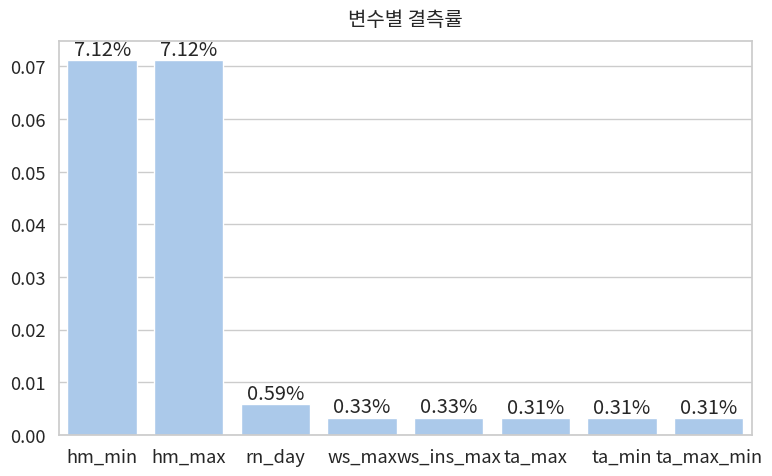

In [208]:
missing_ratio = df_call.isna().mean().sort_values(ascending=False)
missing_ratio = missing_ratio[missing_ratio > 0]

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=missing_ratio.index, y=missing_ratio.values)

for i, v in enumerate(missing_ratio.values):
    ax.text(i, v, f"{v:.2%}", ha="center", va="bottom")

plt.title("변수별 결측률", y=1.02)
plt.xlabel("")
plt.ylabel("")
plt.tight_layout()
plt.show()

### 결측 상관관계 히트맵

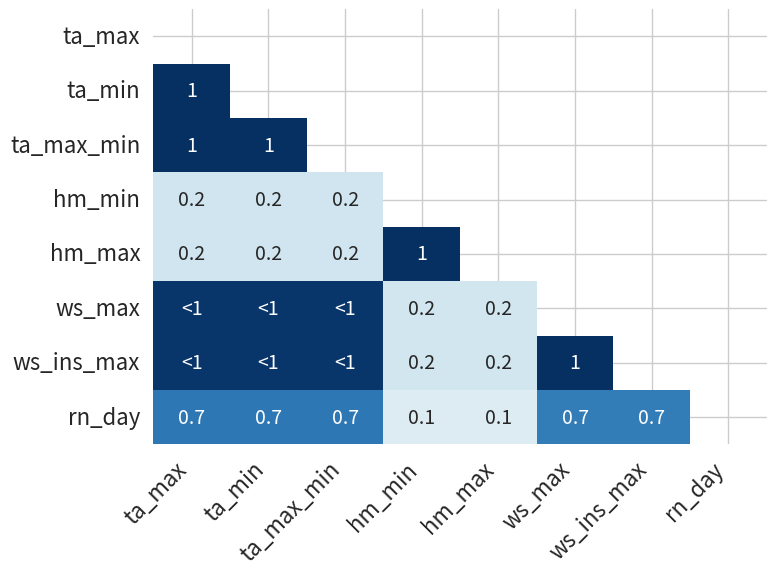

In [209]:
import missingno as msno

msno.heatmap(df_call, figsize=(8, 6), cbar=False)
plt.tight_layout()
plt.show()

## 이상치

### 논리적 이상치

In [210]:
print(f"기온 역전: {(df_call['ta_max'] < df_call['ta_min']).sum()}건")
print(f"습도 역전: {(df_call['hm_max'] < df_call['hm_min']).sum()}건")
print(f"음수 풍속: {((df_call['ws_max'] < 0) | (df_call['ws_ins_max'] < 0)).sum()}건")
print(f"음수 강수량: {(df_call['rn_day'] < 0).sum()}건")

기온 역전: 0건
습도 역전: 0건
음수 풍속: 0건
음수 강수량: 0건


### 중복 행

In [211]:
num_duplicates = df_call.duplicated().sum()
if num_duplicates: print(f"중복 행이 {num_duplicates}개 있습니다.")
else: print("중복 행이 없습니다.")

중복 행이 없습니다.


### 단일값만 존재하는 컬럼

In [212]:
nunique = df_call.nunique()
single_value_cols = nunique[nunique == 1]
for col in single_value_cols.index:
    value = df_call[col].unique().tolist()[0]
    print(f"'{col}' 컬럼에는 단일값 '{value}'만 존재합니다.")

'address_city' 컬럼에는 단일값 '부산광역시'만 존재합니다.


### 기상 변수별 Boxplot

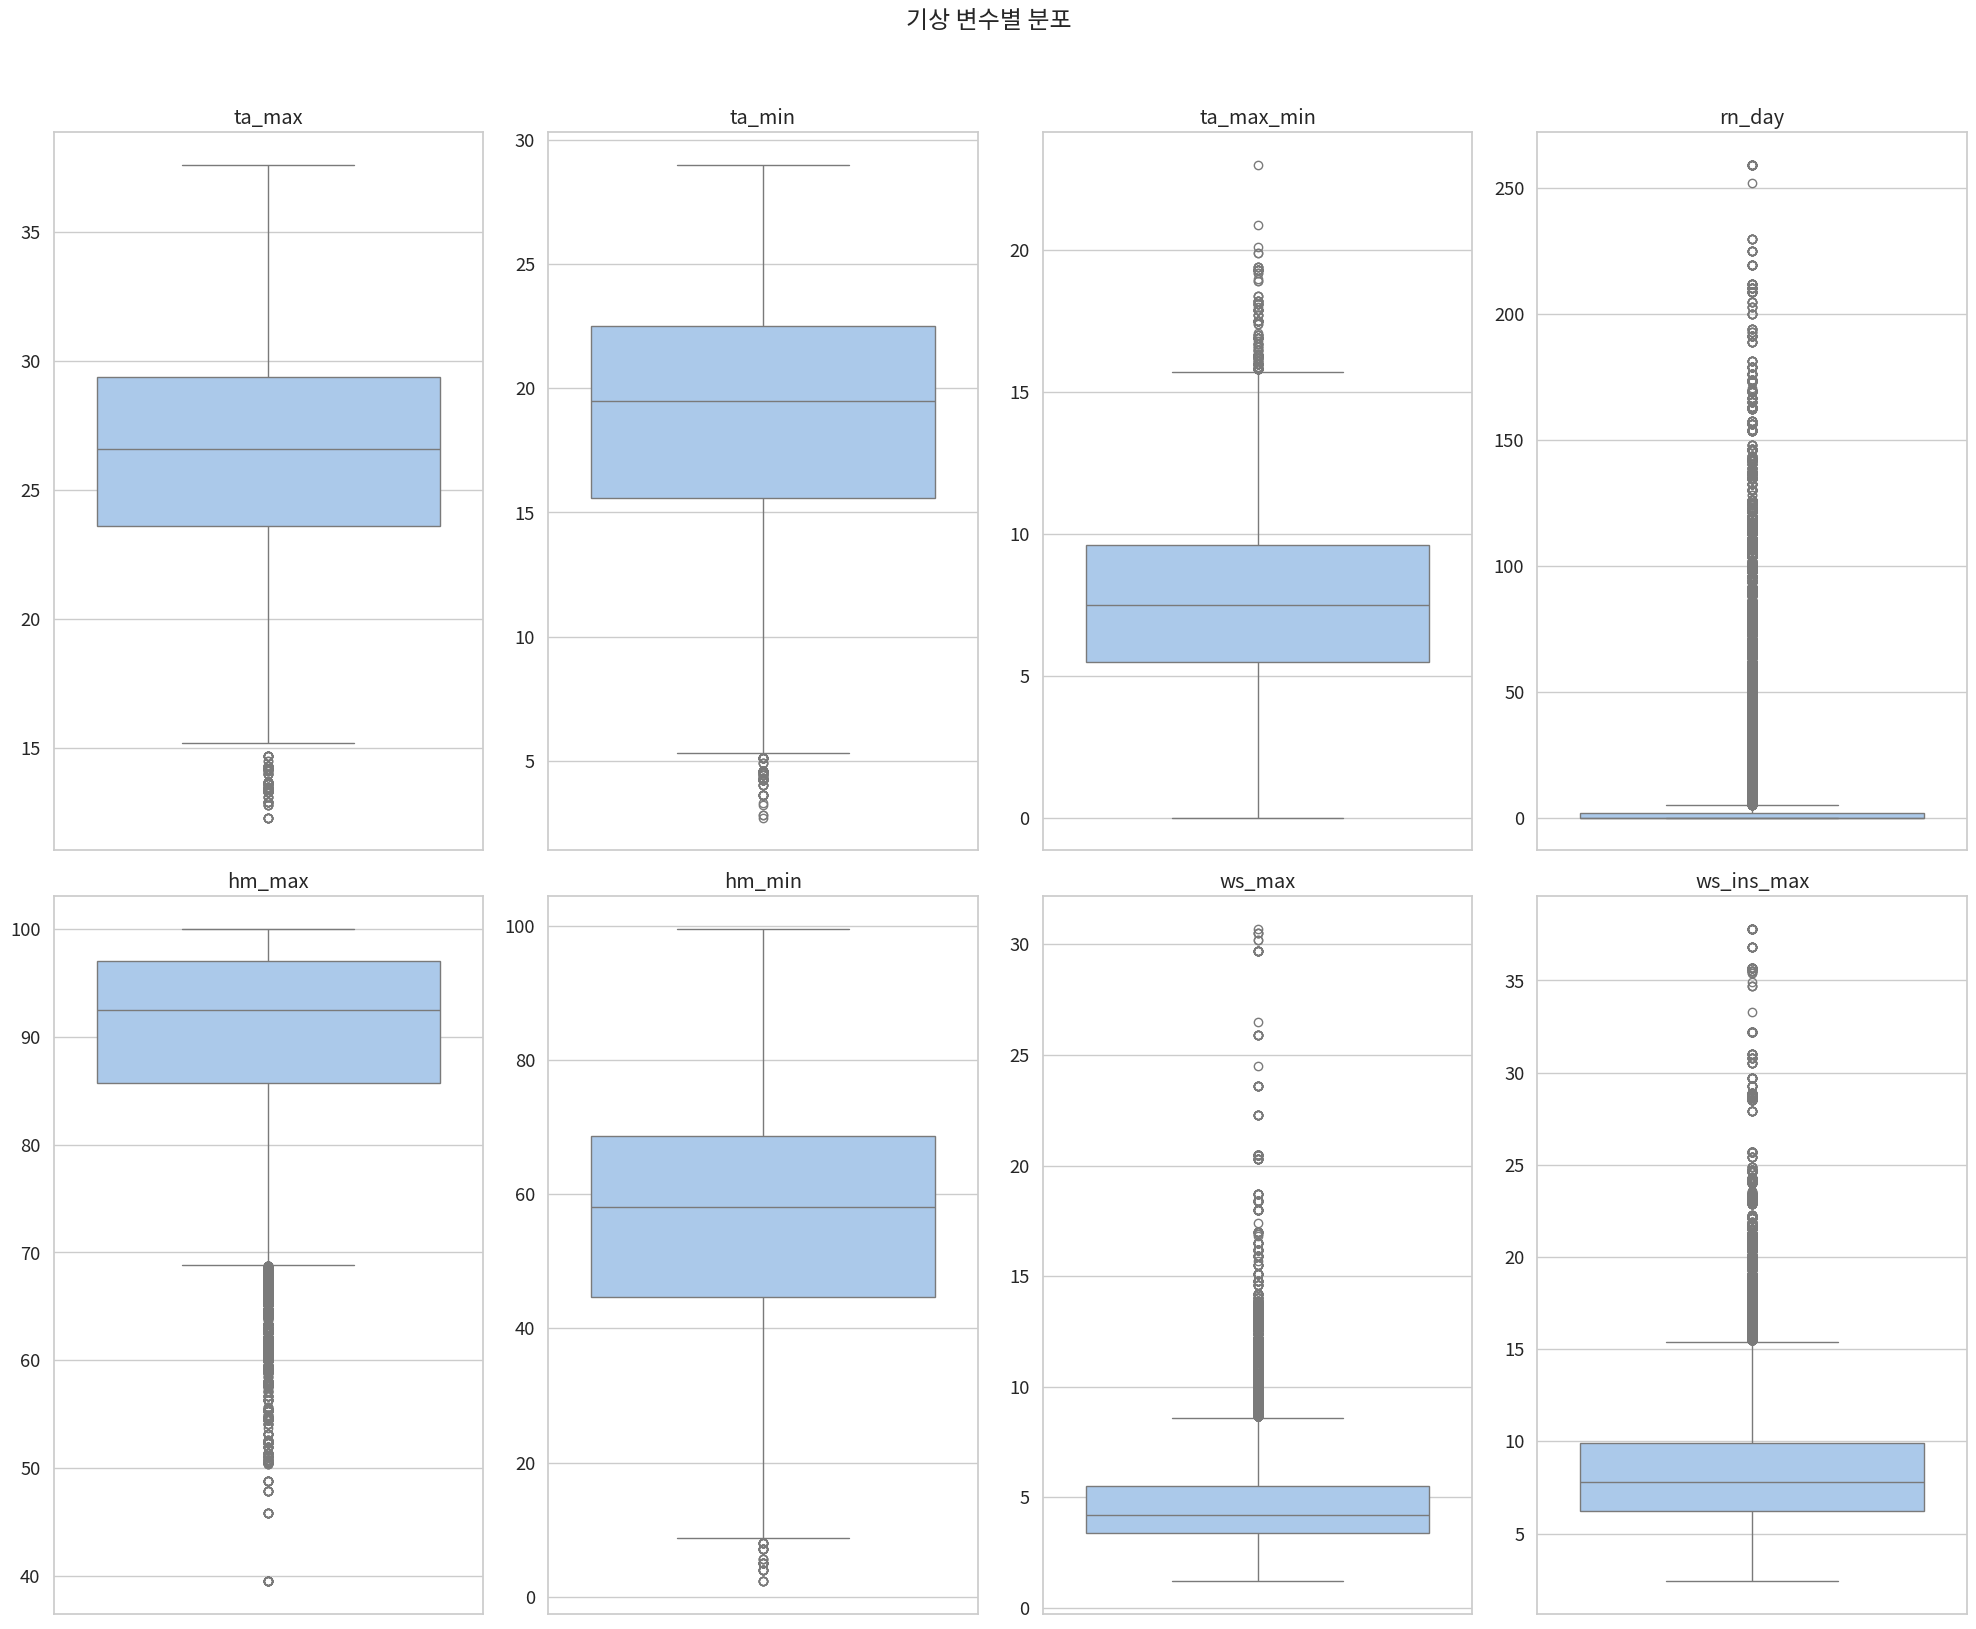

In [213]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 16))
axes = axes.flatten()

target_cols = ["ta_max", "ta_min", "ta_max_min", "rn_day", "hm_max", "hm_min", "ws_max", "ws_ins_max"]

for i, col in enumerate(target_cols):
    sns.boxplot(data=df_call, y=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

plt.suptitle("기상 변수별 분포", y=1.02)
plt.tight_layout()
plt.show()

📝 대부분의 기상 변수는 정상적인 범위 내에서 분포하지만 일부 변수는 극단값이 존재함

### 신고 건수 Histplot

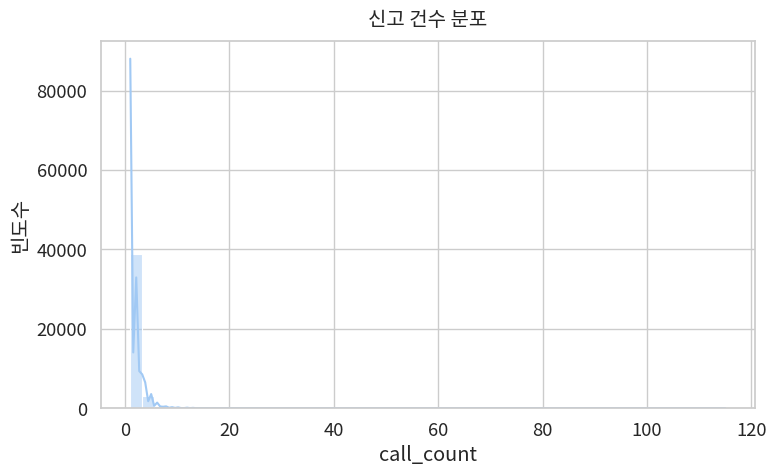

In [214]:
plt.figure(figsize=(8, 5))
sns.histplot(df_call["call_count"], bins=50, kde=True)
plt.title("신고 건수 분포", y=1.02)
plt.xlabel("call_count")
plt.ylabel("빈도수")
plt.tight_layout()
plt.show()

📝 대부분의 값이 1~3건 사이에 밀집되어 있고, 오른쪽 꼬리가 긴 극단적 비대칭 분포임 → 로그 변환 고려

# 신고 데이터 분석

## 전체 신고 건수 흐름

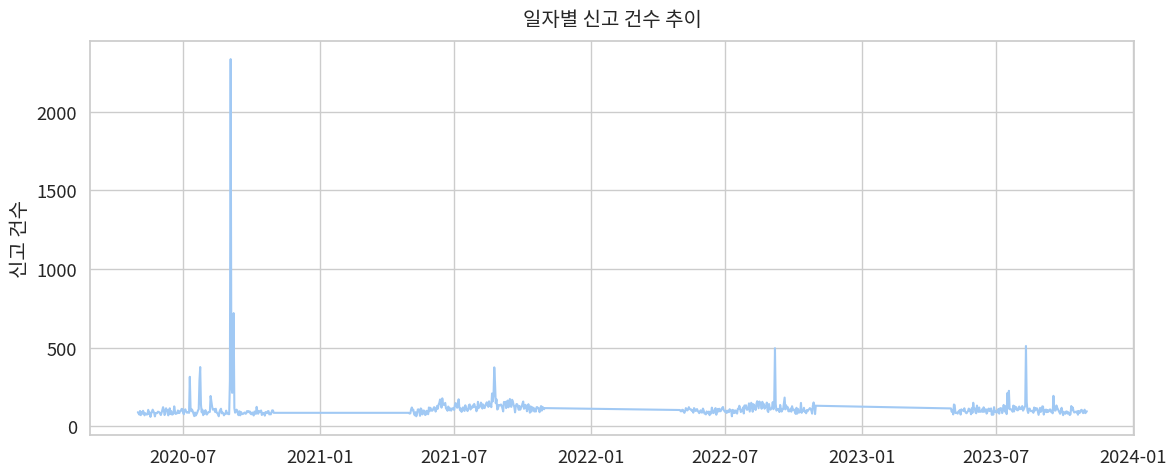

In [215]:
df_call["tm"] = pd.to_datetime(df_call["tm"], format="%Y%m%d")

# 일자별 신고량 시계열
daily_calls = df_call.groupby("tm")["call_count"].sum()

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_calls.index, y=daily_calls.values)
plt.title("일자별 신고 건수 추이", y=1.02)
plt.xlabel("")
plt.ylabel("신고 건수")
plt.tight_layout()
plt.show()

📝 전반적으로 일별 신고 건수는 100건 내외에서 안정적으로 분포하지만, 특정 날짜에 신고 건수가 급증한 스파이크 구간이 여러 번 존재함

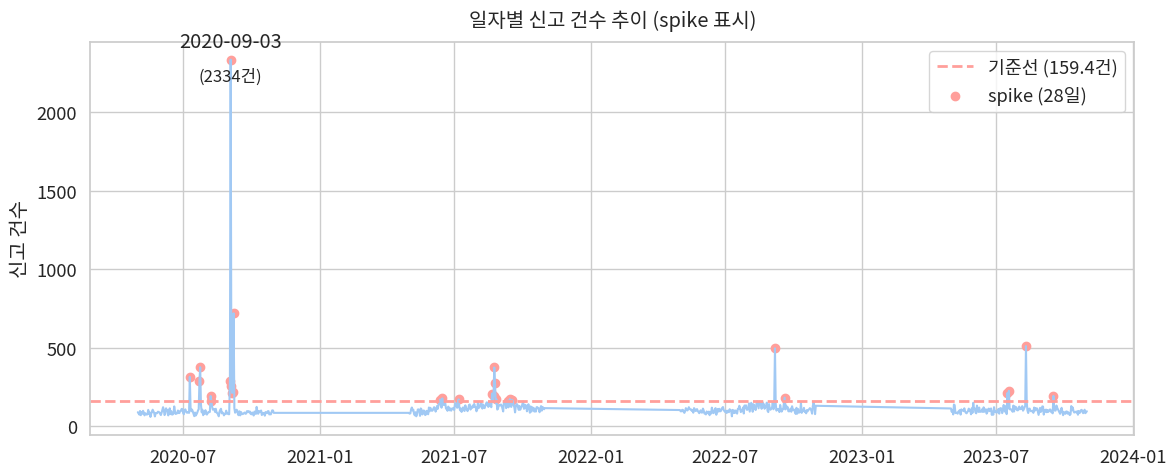

In [216]:
q1 = daily_calls.quantile(0.25)
q3 = daily_calls.quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr

spike = daily_calls[daily_calls > upper_bound]

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_calls.index, y=daily_calls.values)
plt.axhline(upper_bound, color=sns.color_palette("pastel")[3], linestyle="--", linewidth=2, label=f"기준선 ({upper_bound:.1f}건)")
plt.scatter(spike.index, spike.values, color=sns.color_palette("pastel")[3], label=f"spike ({len(spike)}일)")
plt.text(spike.idxmax(), spike.max() + 50, spike.idxmax().strftime("%Y-%m-%d"), ha="center", va="bottom")
plt.text(spike.idxmax(), spike.max() - 50, f"({spike.max()}건)", ha="center", va="top", fontsize=12)
plt.title("일자별 신고 건수 추이 (spike 표시)", y=1.02)
plt.xlabel("")
plt.ylabel("신고 건수")
plt.legend()
plt.tight_layout()
plt.show()

📝 신고 건수가 가장 튀는 날은 2,334건의 2020년 9월 3일 → 제거 또는 플래그 사용 고려

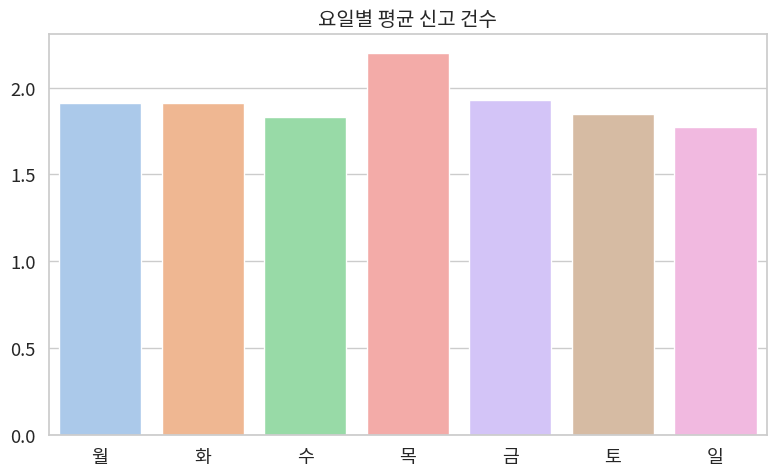

In [217]:
df_call["weekday"] = df_call["tm"].dt.dayofweek

# 요일별 평균 신고량
weekday_avg = df_call.groupby("weekday")["call_count"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values,
            hue=weekday_avg.index, palette="pastel", legend=False)
plt.title("요일별 평균 신고 건수")
plt.xlabel("")
plt.xticks(ticks=range(7), labels=["월", "화", "수", "목", "금", "토", "일"])
plt.tight_layout()
plt.show()

📝 목요일이 상대적으로 많고, 주말은 평일에 비해 적음

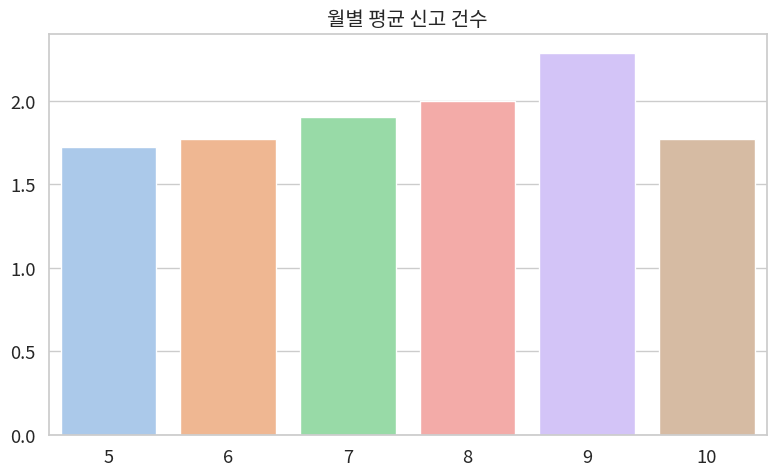

In [218]:
df_call["month"] = df_call["tm"].dt.month

# 월별 평균 신고량
month_avg = df_call.groupby("month")["call_count"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(x=month_avg.index, y=month_avg.values,
            hue=month_avg.index, palette="pastel", legend=False)
plt.title("월별 평균 신고 건수")
plt.xlabel("")
plt.tight_layout()
plt.show()

📝 7~9월에 다소 상승하는 경향이 보임

## 신고 분류 분석

`call_count > 1`인 행을 분해해서 개별 건으로 확장

In [219]:
df_cat_expanded = df_cat.loc[df_cat.index.repeat(df_cat["call_count"])].copy()
df_cat_expanded["call_count"] = 1
df_cat_expanded.reset_index(drop=True, inplace=True)

print(f"df_cat {df_cat.shape}")
display(df_cat[51:54])
print(f"\ndf_cat_expanded {df_cat_expanded.shape}")
display(df_cat_expanded[60:66])

df_cat (61771, 8)


,tm,address_city,address_gu,sub_address,cat,sub_cat,stn,call_count
51,2020-05-01,부산광역시,연제구,연산동,구급,교통사고,940,1
52,2020-05-01,부산광역시,연제구,연산동,구급,부상,940,4
53,2020-05-01,부산광역시,연제구,연산동,기타,업무운행,940,4



df_cat_expanded (82275, 8)


,tm,address_city,address_gu,sub_address,cat,sub_cat,stn,call_count
60,2020-05-01,부산광역시,연제구,연산동,구급,교통사고,940,1
61,2020-05-01,부산광역시,연제구,연산동,구급,부상,940,1
62,2020-05-01,부산광역시,연제구,연산동,구급,부상,940,1
63,2020-05-01,부산광역시,연제구,연산동,구급,부상,940,1
64,2020-05-01,부산광역시,연제구,연산동,구급,부상,940,1
65,2020-05-01,부산광역시,연제구,연산동,기타,업무운행,940,1


### 신고 대분류별 빈도

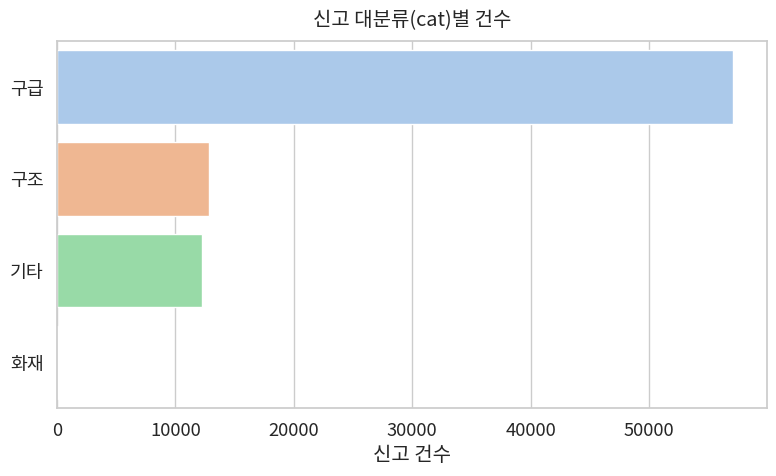

In [220]:
top_cat = df_cat_expanded["cat"].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(y=top_cat.index, x=top_cat.values, hue=top_cat.index, legend=False)
plt.title("신고 대분류(cat)별 건수", y=1.02)
plt.xlabel("신고 건수")
plt.ylabel("")
plt.tight_layout()
plt.show()

📝 `구급`이 압도적으로 많음

### 신고 소분류별 빈도

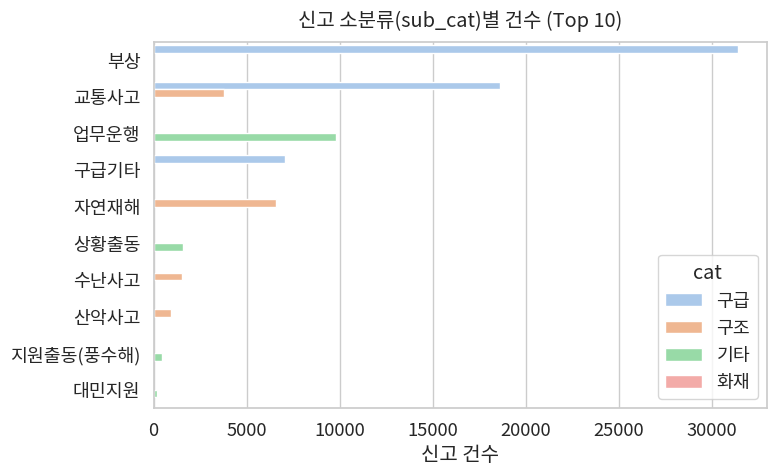

In [221]:
top_sub_cat = df_cat_expanded["sub_cat"].value_counts().head(10).index
df_top_sub_cat = df_cat_expanded[df_cat_expanded["sub_cat"].isin(top_sub_cat)]

order = df_cat_expanded["sub_cat"].value_counts().loc[top_sub_cat].index

plt.figure(figsize=(8, 5))
sns.countplot(data=df_top_sub_cat, y="sub_cat", order=order, hue="cat")
plt.title("신고 소분류(sub_cat)별 건수 (Top 10)", y=1.02)
plt.xlabel("신고 건수")
plt.ylabel("")
plt.tight_layout()
plt.show()

📝 `부상`과 `교통사고`가 압도적으로 많음

### 시간 흐름에 따른 신고 분류 분포

In [222]:
df_cat_expanded["year"] = df_cat_expanded["tm"].dt.year
df_cat_expanded["month"] = df_cat_expanded["tm"].dt.month
df_cat_expanded["ym"] = df_cat_expanded["tm"].dt.to_period("M").astype(str)

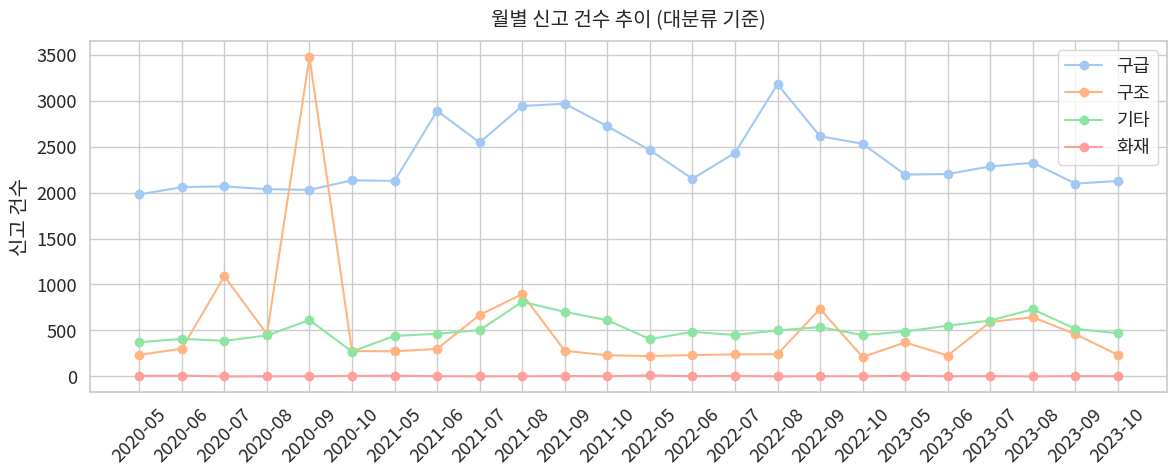

In [223]:
cat_monthly = df_cat_expanded.groupby(["ym", "cat"], observed=True).size().unstack(fill_value=0)

cat_monthly.plot(kind="line", marker="o", figsize=(12, 5))
plt.title("월별 신고 건수 추이 (대분류 기준)", y=1.02)
plt.xlabel("")
plt.ylabel("신고 건수")
plt.xticks(ticks=range(len(cat_monthly)), labels=cat_monthly.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

📝 `구급`이 전체 신고에서 가장 큰 비중을 차지하며, `구조`는 2020년 9월에 급격히 증가함 ← `자연재해`가 주 원인인 것으로 추정됨

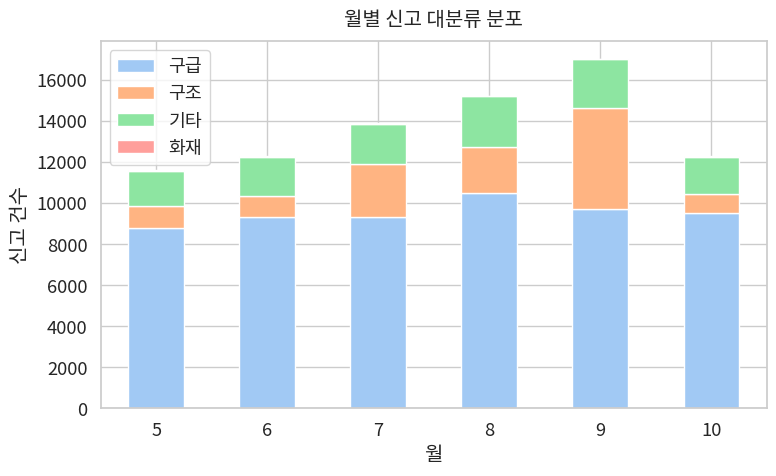

In [255]:
cat_monthly = df_cat_expanded.groupby(["month", "cat"], observed=True).size().unstack(fill_value=0)

cat_monthly.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("월별 신고 대분류 분포", y=1.02)
plt.xlabel("월")
plt.ylabel("신고 건수")
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()

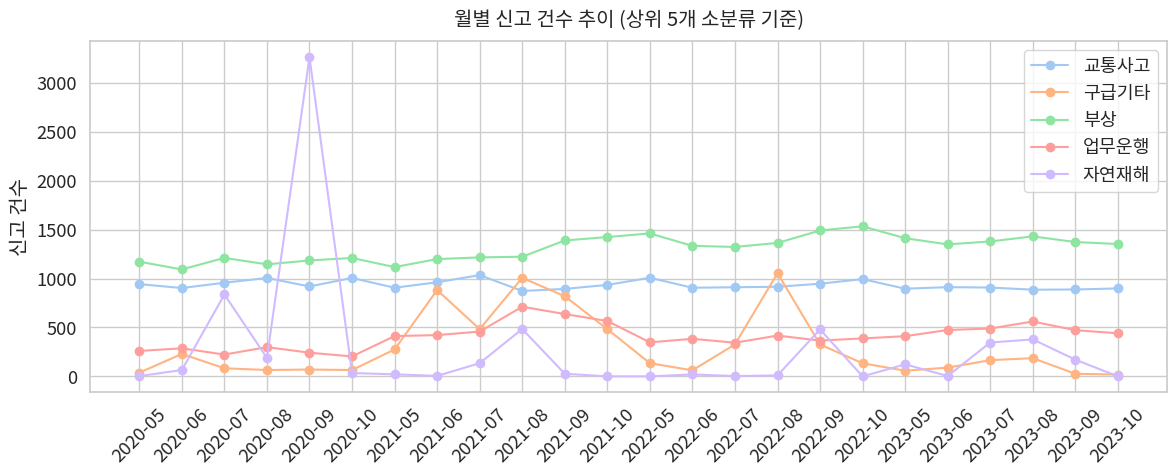

In [225]:
top_sub_cat = df_cat_expanded["sub_cat"].value_counts().head(5).index.tolist()
df_top_sub_cat = df_cat_expanded[df_cat_expanded["sub_cat"].isin(top_sub_cat)]

sub_cat_monthly = df_top_sub_cat.groupby(["ym", "sub_cat"], observed=True).size().unstack(fill_value=0)

sub_cat_monthly.plot(marker="o", figsize=(12, 5))
plt.title("월별 신고 건수 추이 (상위 5개 소분류 기준)", y=1.02)
plt.xlabel("")
plt.ylabel("신고 건수")
plt.xticks(ticks=range(len(sub_cat_monthly)), labels=sub_cat_monthly.index, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

📝 `부상`, `교통사고`, `구급기타`는 전체 기간 내내 상위권을 유지함

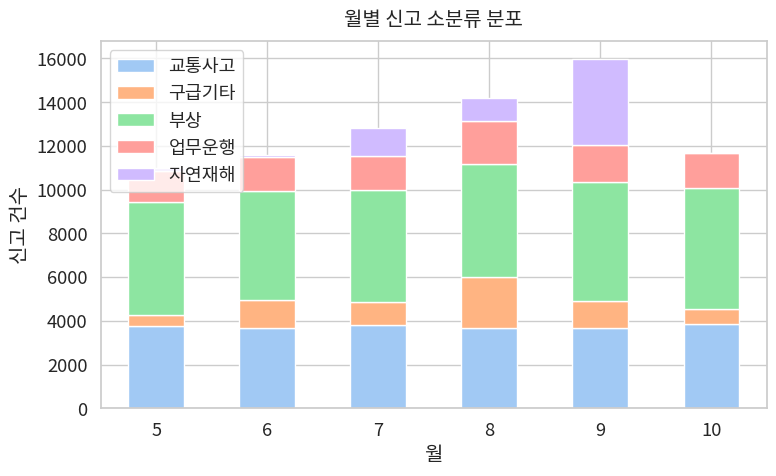

In [259]:
top_sub_cat = df_cat_expanded["sub_cat"].value_counts().head(5).index.tolist()
df_top_sub_cat = df_cat_expanded[df_cat_expanded["sub_cat"].isin(top_sub_cat)]

sub_cat_monthly = df_top_sub_cat.groupby(["month", "sub_cat"], observed=True).size().unstack(fill_value=0)

sub_cat_monthly.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("월별 신고 소분류 분포", y=1.02)
plt.xlabel("월")
plt.ylabel("신고 건수")
plt.xticks(rotation=0)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

### spike 신고 분류 분포

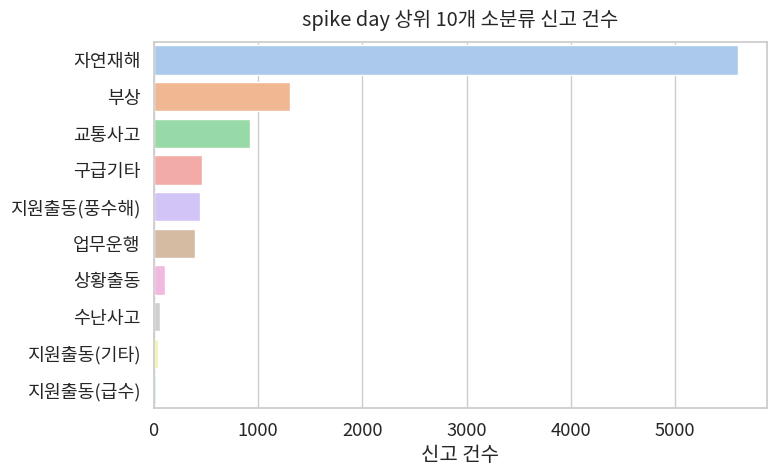

In [227]:
spike_days = spike.index

df_spike_days = df_cat_expanded[df_cat_expanded["tm"].isin(spike_days)]
df_spike_subcat = df_spike_days["sub_cat"].value_counts().head(10).reset_index()
df_spike_subcat["sub_cat"] = df_spike_subcat["sub_cat"].astype(str)

plt.figure(figsize=(8, 5))
sns.barplot(data=df_spike_subcat, y="sub_cat", x="count", hue="sub_cat", legend=False)
plt.title("spike day 상위 10개 소분류 신고 건수", y=1.02)
plt.xlabel("신고 건수")
plt.ylabel("")
plt.tight_layout()
plt.show()

📝 `자연재해`가 압도적으로 많음 ← spike의 주된 원인

## 지역별 신고 분포

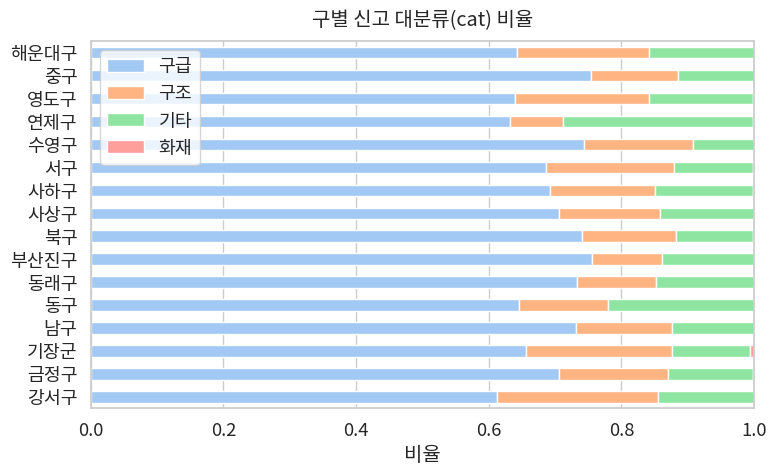

In [254]:
cat_by_gu = df_cat_expanded.groupby(["address_gu", "cat"], observed=False).size().unstack(fill_value=0)
cat_by_gu_ratio = cat_by_gu.div(cat_by_gu.sum(axis=1), axis=0)

cat_by_gu_ratio.plot(kind="barh", stacked=True, figsize=(8, 5))

plt.title("구별 신고 대분류(cat) 비율", y=1.02)
plt.xlabel("비율")
plt.ylabel("")
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

📝 모든 지역에서 `구급` 비율이 가장 높고, `구조`, `기타`의 비중은 지역에 따라 차이가 있음

# 기상 데이터 분석

## 상관관계

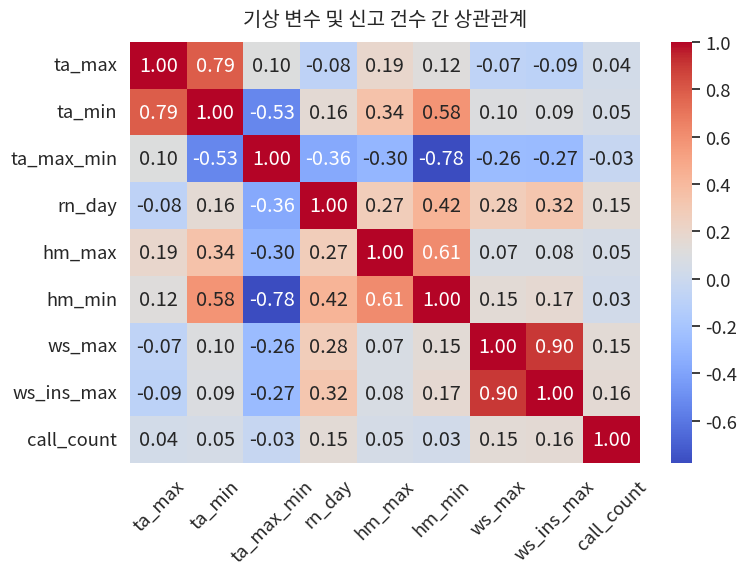

In [229]:
weather_cols = ["ta_max", "ta_min", "ta_max_min", "rn_day", "hm_max", "hm_min", "ws_max", "ws_ins_max"]
corr = df_call[weather_cols + ["call_count"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("기상 변수 및 신고 건수 간 상관관계", y=1.02)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

📝 `call_count`와 기상 변수들 간 상관계수 매우 작음

⚠️ 주의

- `ta_max` ↔ `ta_min`: 강한 양의 상관

- `ta_max_min` ↔ `hm_min`: 강한 음의 상관

## 기상 변수별 신고 건수 Scatterplot

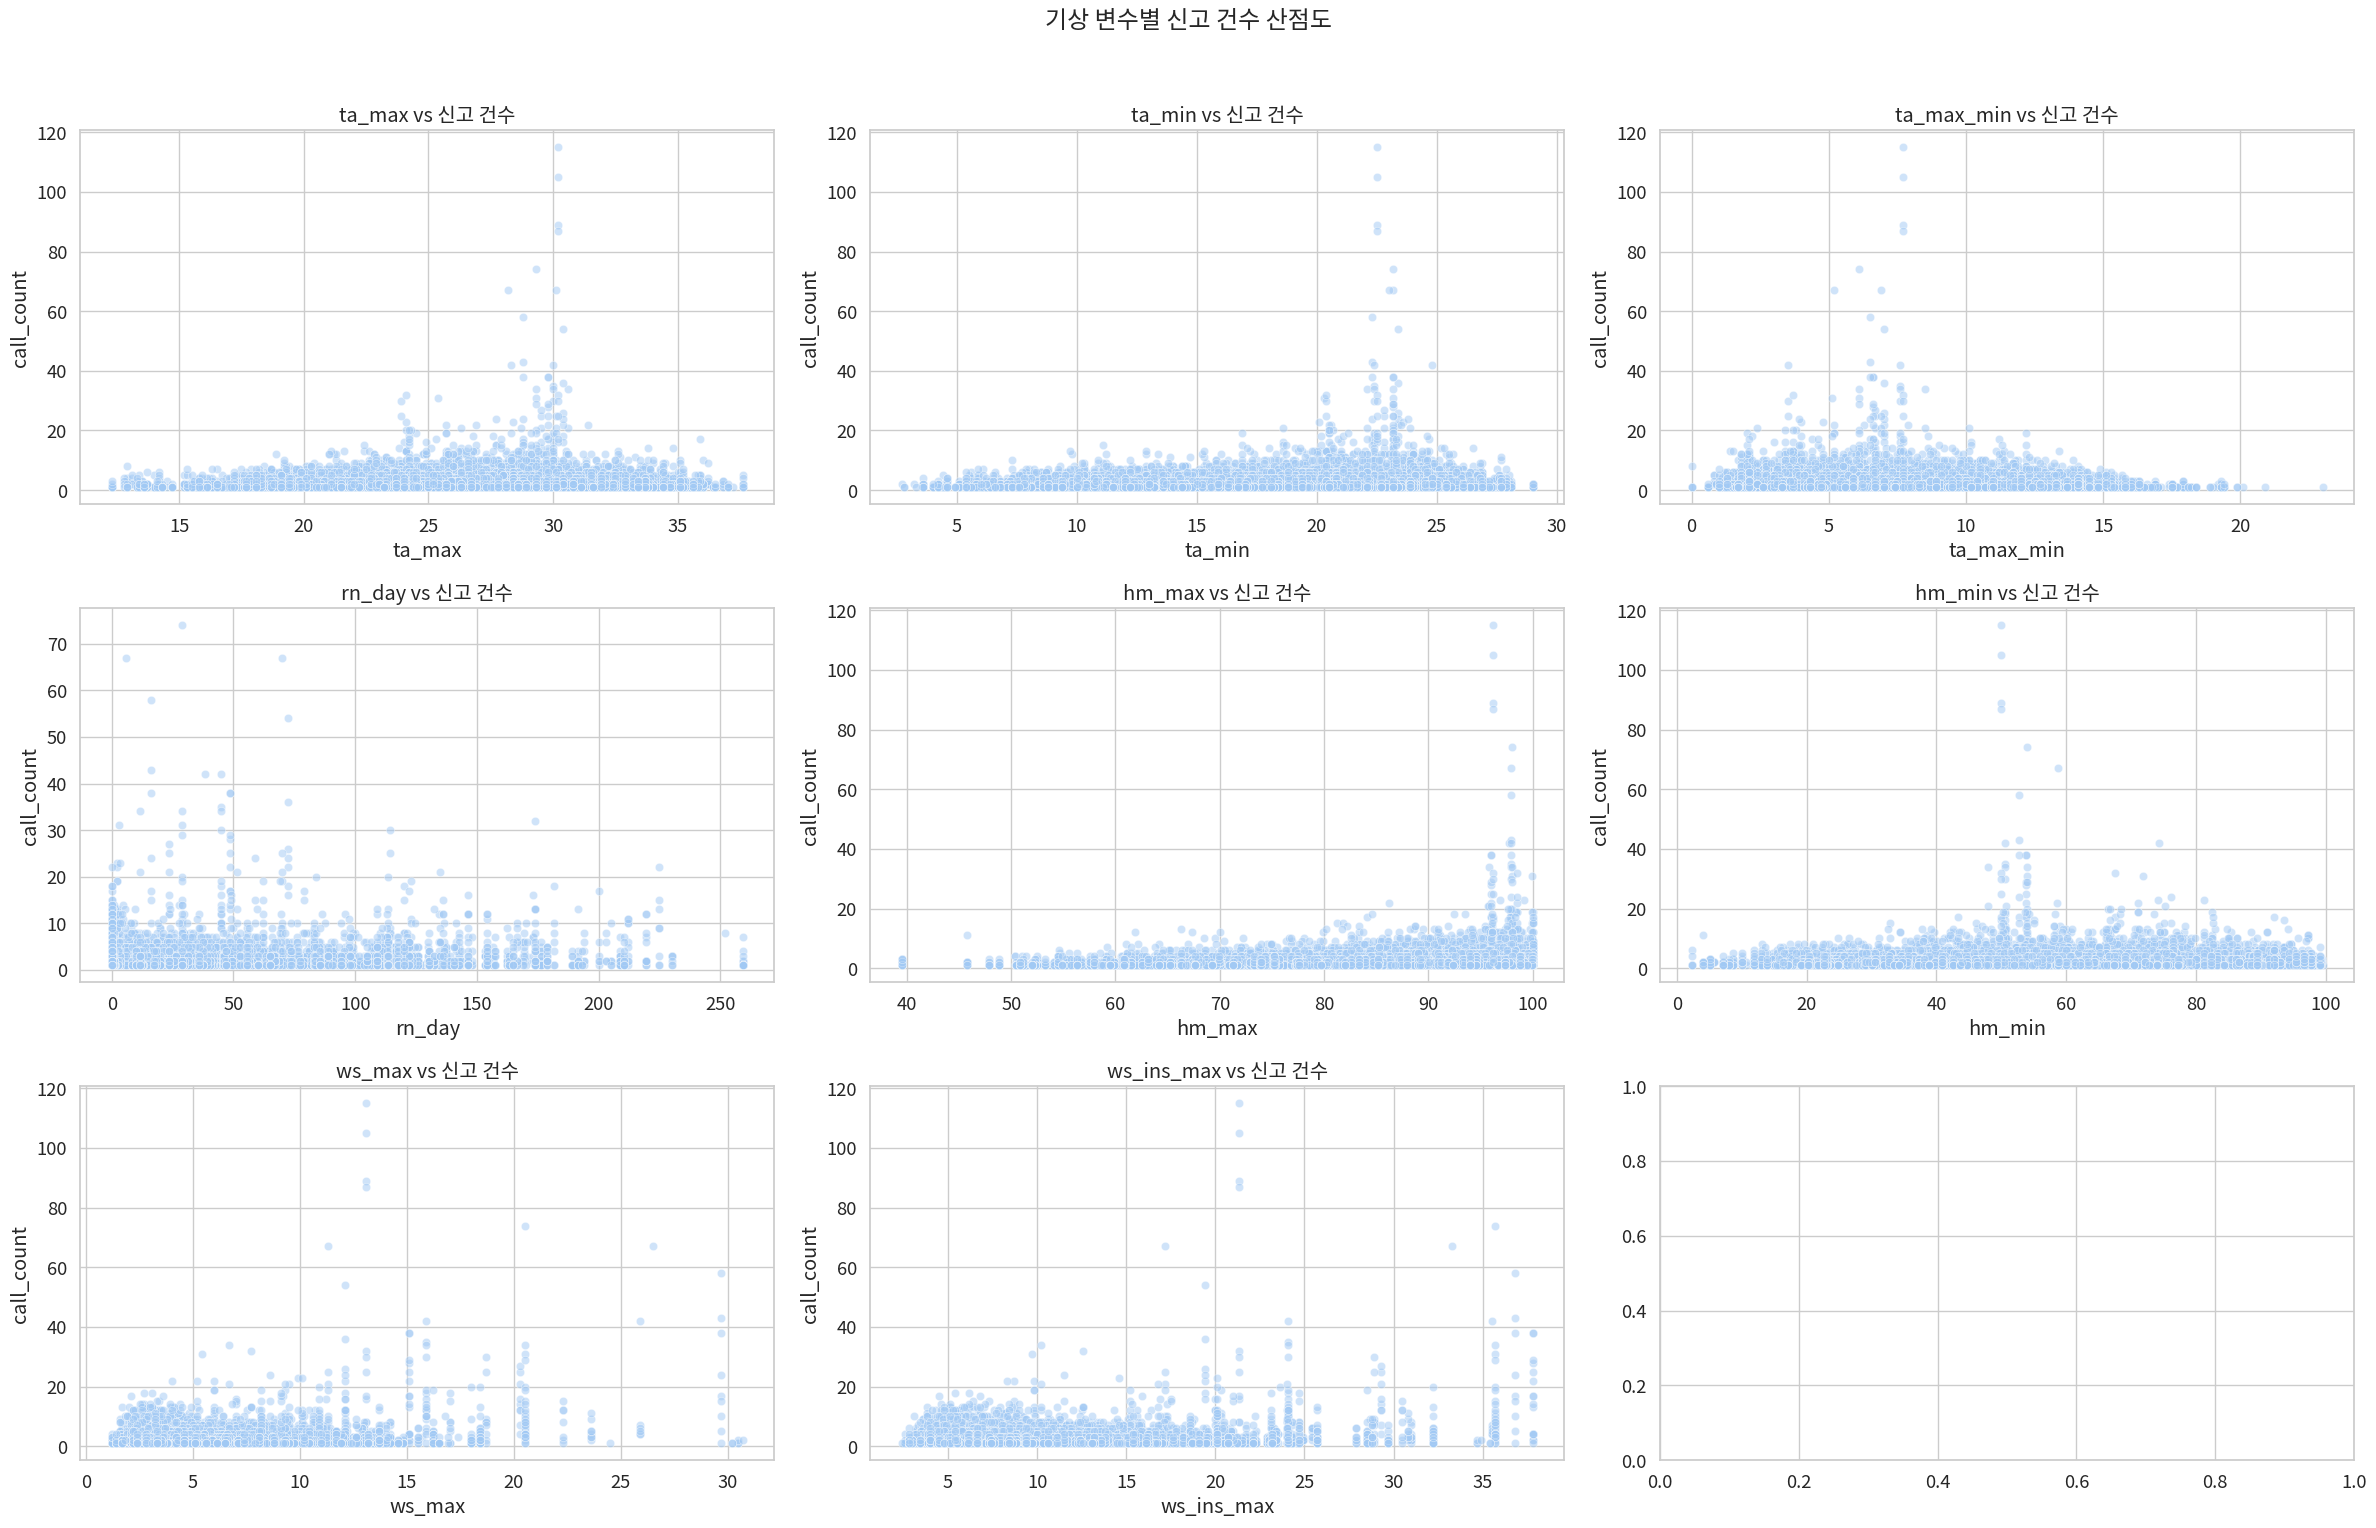

In [230]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(24, 15))
axes = axes.flatten()

for i, col in enumerate(weather_cols):
    sns.scatterplot(data=df_call, x=col, y="call_count", alpha=0.5, ax=axes[i])
    axes[i].set_title(f"{col} vs 신고 건수")

plt.suptitle("기상 변수별 신고 건수 산점도", y=1.02)
plt.tight_layout()
plt.show()

## 시간 흐름에 따른 기상 변화

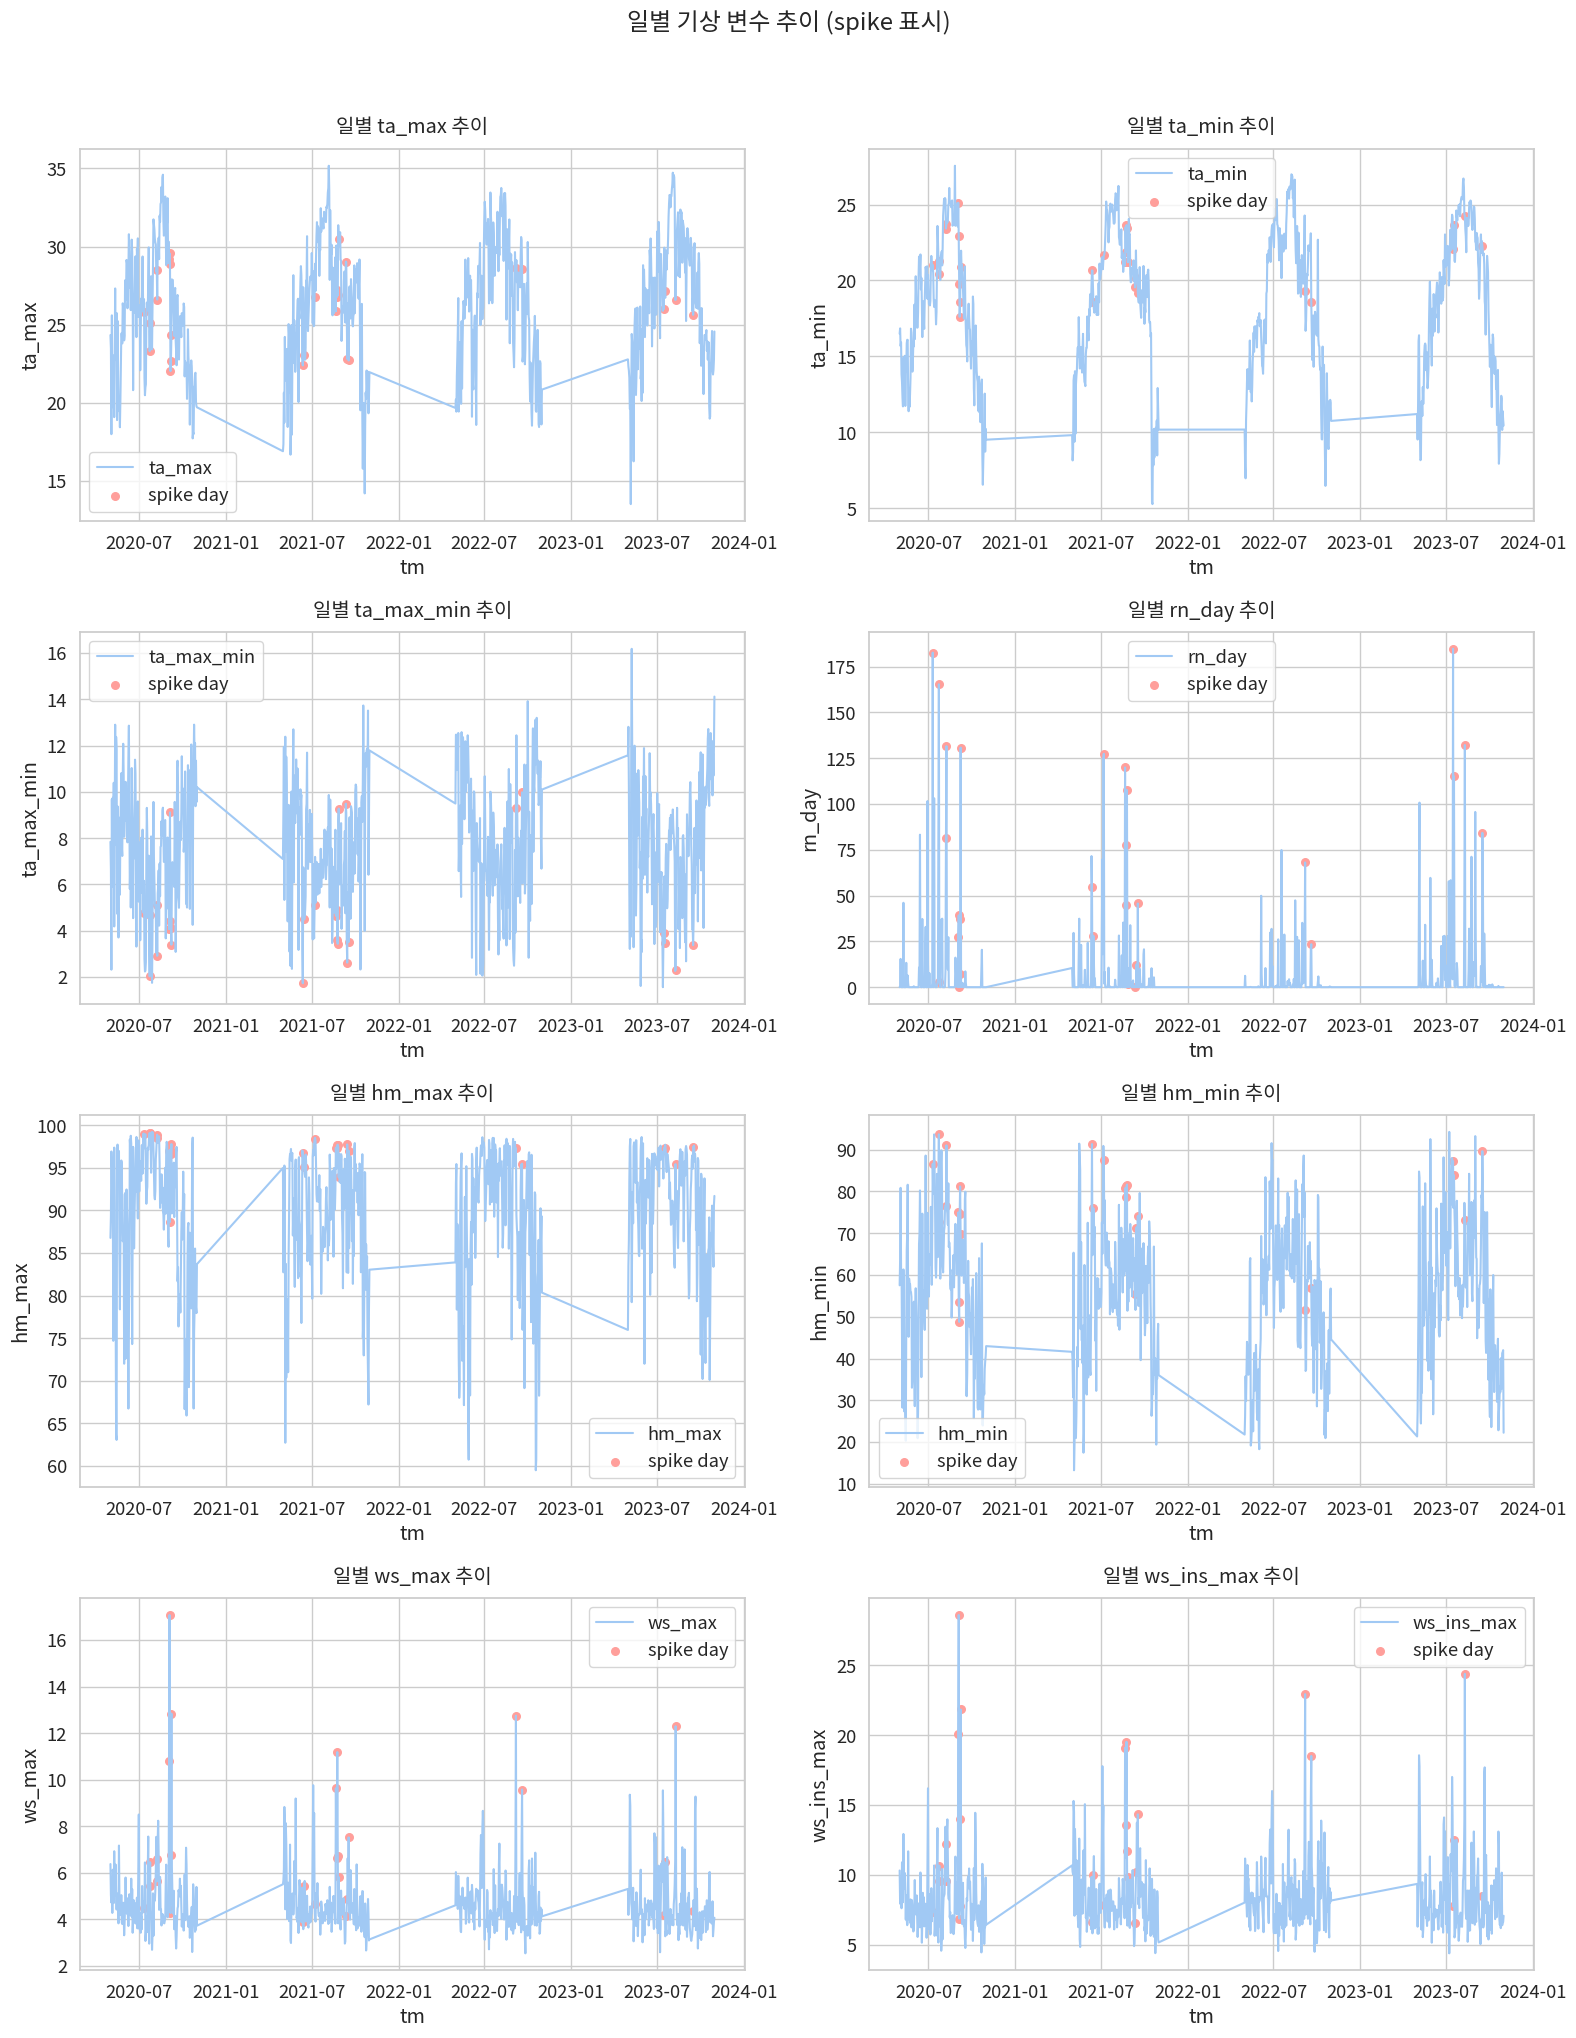

In [231]:
df_daily_weather = df_call.groupby("tm")[weather_cols].mean()
df_daily_weather["is_spike_day"] = df_daily_weather.index.isin(spike.index)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(16, 20))
axes = axes.flatten()

for i, col in enumerate(weather_cols):
    sns.lineplot(x=df_daily_weather.index, y=df_daily_weather[col], label=f"{col}", ax=axes[i])
    axes[i].scatter(
        df_daily_weather[df_daily_weather["is_spike_day"]].index,
        df_daily_weather[df_daily_weather["is_spike_day"]][col],
        color=sns.color_palette("pastel")[3], label="spike day", s=30
    )
    axes[i].set_title(f"일별 {col} 추이", y=1.02)
    axes[i].legend()

plt.suptitle("일별 기상 변수 추이 (spike 표시)", y=1.02)
plt.tight_layout()
plt.show()

## spike 기상 조건 특징

In [232]:
df_call["is_spike_day"] = df_call["tm"].isin(spike.index)
df_call.groupby("is_spike_day")[weather_cols].mean().T

is_spike_day,False,True
ta_max,26.422004,26.277937
ta_min,18.646464,21.368343
ta_max_min,7.775540,4.909594
rn_day,5.219039,74.537122
hm_max,89.683277,96.770218
hm_min,55.688863,74.486506
ws_max,4.590943,7.711516
ws_ins_max,8.222686,13.951228


📝 spike에 명확한 기상적 패턴이 존재하는 것으로 판단됨

# 기상특보 데이터 분석

## 구조 확인

In [233]:
url = "https://raw.githubusercontent.com/s0nghyunje0ng/2025-weather-bigdata-contest/safety/topic2_safety/data/processed/busan_weather_warning.csv"
df_wrn = pd.read_csv(url)

In [234]:
print(f"df_wrn {df_wrn.shape}")
df_wrn.head()

df_wrn (1007, 7)


,발표시각,지역,해당지역,특보종류,특보수준,특보명령,발효시각
0,2020-05-02 21:00:00,부산·울산·경상남도,"울산, 부산, 경상남도(고성, 거제, 통영 제외)",건조,주의보,해제,2020-05-02 21:00:00
1,2020-05-09 09:30:00,부산·울산·경상남도,"울산, 부산, 경상남도(남해, 거제, 통영)",강풍,주의보,발표,2020-05-09 11:00:00
2,2020-05-09 09:30:00,부산·울산·경상남도,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다)",풍랑,주의보,발표,2020-05-09 11:00:00
3,2020-05-09 16:00:00,부산·울산·경상남도,"울산, 부산, 경상남도(남해, 거제, 통영)",강풍,주의보,해제,2020-05-09 18:00:00
4,2020-05-09 19:00:00,부산·울산·경상남도,"남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다)",풍랑,주의보,해제,2020-05-09 21:00:00


In [235]:
df_wrn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   발표시각    1007 non-null   object
 1   지역      1007 non-null   object
 2   해당지역    1007 non-null   object
 3   특보종류    1007 non-null   object
 4   특보수준    1007 non-null   object
 5   특보명령    1007 non-null   object
 6   발효시각    1007 non-null   object
dtypes: object(7)
memory usage: 55.2+ KB


In [236]:
df_wrn["발표시각"] = pd.to_datetime(df_wrn["발표시각"])
df_wrn["발효시각"] = pd.to_datetime(df_wrn["발효시각"])
df_wrn["발효일"] = pd.to_datetime(df_wrn["발효시각"]).dt.normalize()

In [237]:
df_wrn.describe(include="object")

,지역,해당지역,특보종류,특보수준,특보명령
count,1007,1007,1007,1007,1007
unique,1,294,9,2,3
top,부산·울산·경상남도,부산,풍랑,주의보,발표
freq,1007,76,399,921,458


In [238]:
cat_cols = df_wrn.select_dtypes(include=["object"]).columns.tolist()

for col in cat_cols:
    print(f"{col} : {df_wrn[col].unique().tolist()}")

지역 : ['부산·울산·경상남도']
해당지역 : ['울산, 부산, 경상남도(고성, 거제, 통영 제외)', '울산, 부산, 경상남도(남해, 거제, 통영)', '남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다)', '울산, 부산, 경상남도(거제, 통영)', '남해동부앞바다(거제시동부앞바다, 경남서부남해앞바다, 부산앞바다), 동해남부앞바다(울산앞바다)', '울산, 부산, 경상남도(진주, 양산, 합천, 거창, 함양, 산청, 창녕, 함안, 의령, 밀양, 김해, 창원)', '부산, 경상남도(고성, 창원)', '부산, 경상남도(남해, 고성, 사천, 창원)', '울산, 부산, 경상남도(남해, 고성, 거제, 사천, 통영, 하동, 김해, 창원)', '부산', '울산, 부산, 경상남도(양산, 김해)', '부산, 경상남도(거제, 통영)', '울산, 부산, 경상남도(남해, 고성, 거제, 사천, 통영, 창원)', '남해동부앞바다(거제시동부앞바다, 부산앞바다), 동해남부앞바다(울산앞바다)', '울산, 부산', '남해동부먼바다, 남해동부앞바다(거제시동부앞바다, 부산앞바다), 동해남부앞바다(울산앞바다)', '울산, 부산, 경상남도(양산)', '부산, 경상남도(남해, 고성, 거제, 사천, 통영, 하동, 김해)', '울산, 부산, 경상남도(창원)', '울산, 부산, 경상남도(남해, 고성, 거제, 사천, 통영)', '부산, 경상남도(남해, 고성, 거제, 사천, 통영, 하동, 창원)', '울산, 부산, 경상남도(양산, 고성, 거제, 통영, 밀양, 김해, 창원)', '울산, 부산, 경상남도(진주, 양산, 사천, 합천, 거창, 함양, 산청, 하동, 창녕, 함안, 의령, 밀양, 김해, 창원)', '부산, 경상남도(양산, 김해, 창원)', '울산, 부산, 경상남도', '울산, 부산, 경상남도(양산, 김해, 창원)', '부산, 경상남도(진주, 거제, 통영, 합천, 거창, 함양, 산청, 하동, 창녕, 의령)', '부산, 경상남도(거제)', '울산, 부산, 경상남도(양산, 고성, 거창, 함양, 

In [239]:
start = pd.to_datetime("2020-05-01")
end = pd.to_datetime("2024-10-31")

df_wrn_filtered = df_wrn[
    (df_wrn["발효일"].dt.month.isin([5, 6, 7, 8, 9, 10])) &
    (df_wrn["발효일"].dt.year.between(2020, 2024)) &
    (df_wrn["특보명령"] != "해제")
].copy()

## 특보 추이 시각화

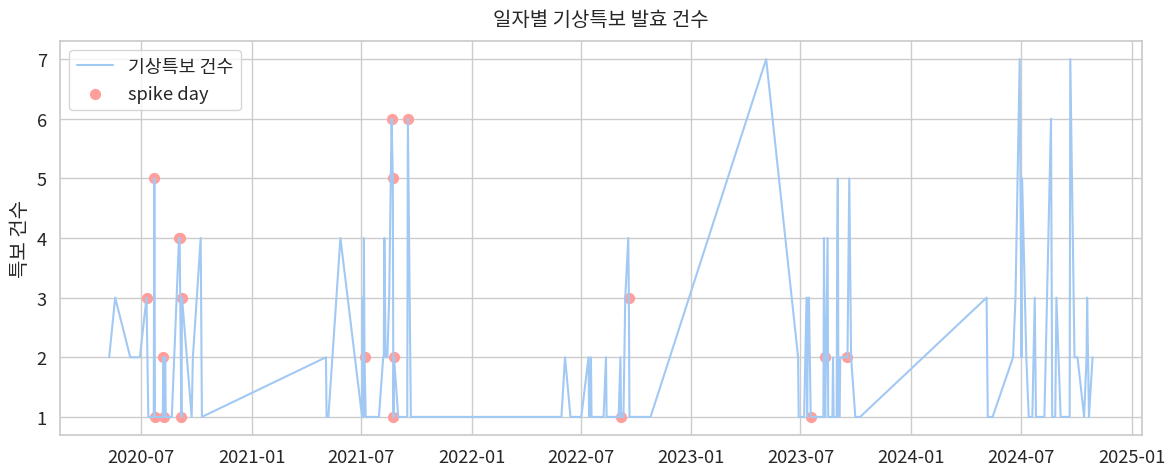

In [240]:
daily_alerts = df_wrn_filtered.groupby("발효일").size()
daily_alerts.index = pd.to_datetime(daily_alerts.index)
spike_on_alerts = daily_alerts[daily_alerts.index.isin(spike_days)]

plt.figure(figsize=(12, 5))
sns.lineplot(x=daily_alerts.index, y=daily_alerts.values, label="기상특보 건수")
plt.scatter(
    spike_on_alerts.index, spike_on_alerts.values,
    color=sns.color_palette("pastel")[3], label="spike day", s=50
)
plt.title("일자별 기상특보 발효 건수", y=1.02)
plt.xlabel("")
plt.ylabel("특보 건수")
plt.legend()
plt.tight_layout()
plt.show()

## 특보 종류/수준/명령 분석

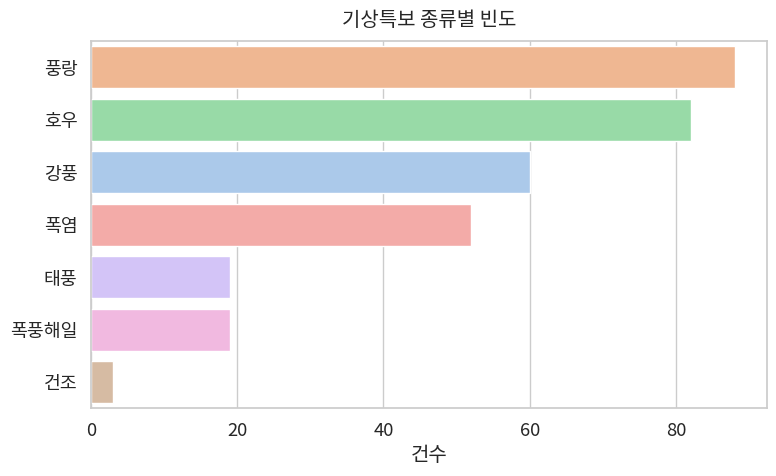

In [241]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_wrn_filtered, y="특보종류", order=df_wrn_filtered["특보종류"].value_counts().index, hue="특보종류")
plt.title("기상특보 종류별 빈도", y=1.02)
plt.xlabel("건수")
plt.ylabel("")
plt.tight_layout()
plt.show()

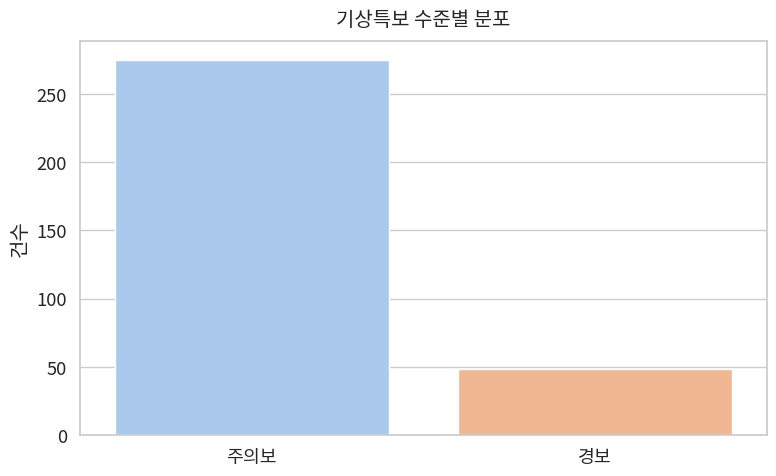

In [242]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_wrn_filtered, x="특보수준", hue="특보수준")
plt.title("기상특보 수준별 분포", y=1.02)
plt.xlabel("")
plt.ylabel("건수")
plt.tight_layout()
plt.show()

📝 `주의보`가 압도적으로 많고 위험도가 높은 상황으로 판단되는 `경보`는 상대적으로 적음

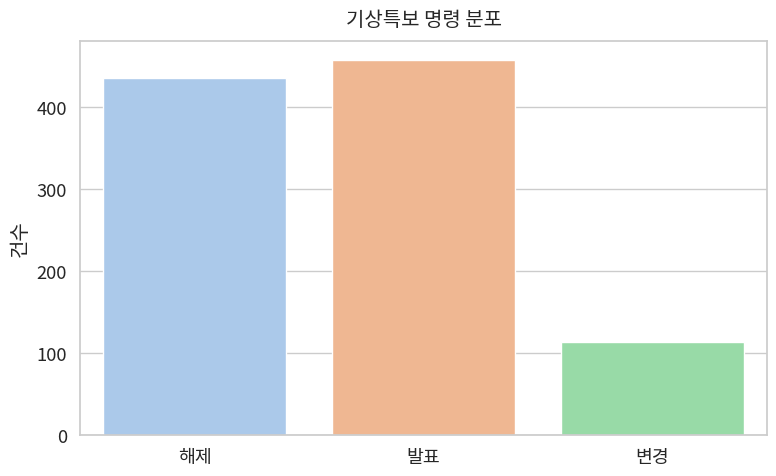

In [243]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_wrn, x="특보명령", hue="특보명령")
plt.title("기상특보 명령 분포", y=1.02)
plt.xlabel("")
plt.ylabel("건수")
plt.tight_layout()
plt.show()

📝 `해제`와 `발표`의 건수가 같지 않음 ← `발표`되었다가 소멸되거나, 중간에 `변경`되는 경우가 있기 때문에

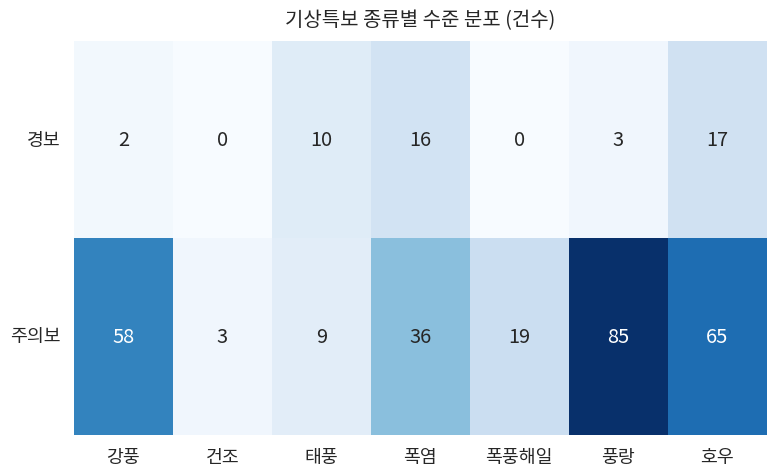

In [244]:
cross_tab = pd.crosstab(df_wrn_filtered["특보수준"], df_wrn_filtered["특보종류"])

plt.figure(figsize=(8, 5))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("기상특보 종류별 수준 분포 (건수)", y=1.02)
plt.xlabel("")
plt.ylabel("")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

📝

- `태풍`: 경보 비율이 높음

- `폭염`, `호우`: 주의보와 경보 혼재

- `강풍`, `풍랑`, `건조`, `폭풍해일`: 경보 거의 없음

## spike 기상특보

특보가 있었던 spike day 특보 종류 및 수준 분포

In [245]:
spike_days_with_alerts = spike_on_alerts.index
df_spike_with_alerts = df_wrn_filtered[df_wrn_filtered["발효일"].isin(spike_days_with_alerts)]

kind_dist = df_spike_with_alerts["특보종류"].value_counts()
level_dist = df_spike_with_alerts["특보수준"].value_counts()
kind_level_cross = pd.crosstab(df_spike_with_alerts["특보수준"], df_spike_with_alerts["특보종류"])

kind_level_cross

특보종류,강풍,태풍,풍랑,호우
특보수준,,,,
경보,0,6,2,7
주의보,14,6,8,12


특보가 없었던 spike day 확인

In [246]:
print(f"특보가 있었던 spike day는 {len(spike_days[spike_days.isin(spike_days_with_alerts)])}일입니다.")
print(f"반면, 특보가 없었던 spike day는 {len(spike_days[~spike_days.isin(spike_days_with_alerts)])}일입니다.")

특보가 있었던 spike day는 20일입니다.
반면, 특보가 없었던 spike day는 8일입니다.


특보 건수와 spike 신고 건수 간 관계

In [247]:
spike_call_counts = spike[spike.index.isin(spike_days_with_alerts)]
alert_counts_on_spike_days = spike_on_alerts

spike_correlation_df = pd.DataFrame({
    "call_count": spike_call_counts.values,
    "alert_count": spike_on_alerts.values
})

correlation = spike_correlation_df.corr().iloc[0, 1]
print(f"특보 건수와 spike 신고 건수 간 상관계수는 {correlation:.4f}입니다.")

특보 건수와 spike 신고 건수 간 상관계수는 0.1058입니다.


기상특보 지연효과

In [253]:
alert_days = df_wrn_filtered["발효일"].unique()
spike_days = spike.index

# 지연효과 분석
lag_results = {}
for lag in [0, 1, 2, 3]:
    shifted_days = pd.to_datetime(alert_days) + pd.Timedelta(days=lag)
    matched_spike_days = spike_days[spike_days.isin(shifted_days)]
    lag_results[lag] = {
        "total_alert_days": len(shifted_days),
        "matched_spike_days": len(matched_spike_days),
        "ratio": len(matched_spike_days) / len(shifted_days)
    }

df_lag_result_revised = pd.DataFrame(lag_results).T
df_lag_result_revised.index.name = "lag_days"
df_lag_result_revised

,total_alert_days,matched_spike_days,ratio
lag_days,,,
0,176.0,20.0,0.113636
1,176.0,15.0,0.085227
2,176.0,11.0,0.062500
3,176.0,6.0,0.034091


📝 spike 발생률은 lag=0(당일) 11.4%로 가장 높고, lag=1~3 시간이 지날수록 감소함